# Random Sample Consensus(RANSAC) Algorithm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
import sys
print(sys.version)

1.19.2
1.1.3
0.11.0
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [4]:
df = pd.read_csv('C:/Users/naray/OneDrive/Desktop/HousingData.csv')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
X = df['RM'].values.reshape(-1,1)
Y = df['MEDV'].values

In [15]:
from sklearn.linear_model import RANSACRegressor

In [16]:
model = RANSACRegressor()

In [17]:
model.fit(X,Y)

RANSACRegressor()

In [19]:
inlier = model.inlier_mask_
outlier = np.logical_not(inlier)

In [21]:
line_x = np.arange(3,10,1)
line_y_ransac = model.predict(line_x.reshape(-1,1))

In [22]:
line_y_ransac

array([-8.61387816,  0.84137386, 10.29662587, 19.75187788, 29.2071299 ,
       38.66238191, 48.11763392])

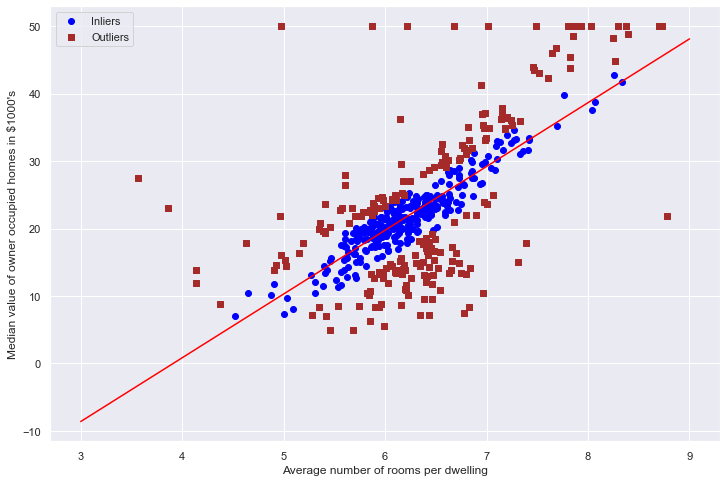

In [23]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier],Y[inlier],c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier],Y[outlier],c='brown',marker='s',label='Outliers')
plt.plot(line_x,line_y_ransac,color='red')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()


In [25]:
model.estimator_.coef_

array([9.45525201])

In [26]:
model.estimator_.intercept_

-36.97963419573525